In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

dataset = "sepsis"

experiment_path_standard = "experiments/results/sepsis/spesis_standard" 
experiment_path_evo_all = "experiments/results/sepsis/spesis_evo_fast_custom_fitness" 

In [4]:
#Join all the dataframes
n_core = os.cpu_count() #Da sostituire con il numero di core usato
df_standard = pd.read_csv(experiment_path_standard + "/global_result_0_0.csv")
df_evo_all = pd.read_csv(experiment_path_evo_all + "/global_result_0_0.csv")

for i in range(n_core):
    df_standard = pd.concat([df_standard, pd.read_csv(experiment_path_standard + "/global_result_0_" + str(i) + ".csv")], ignore_index=True)
    df_evo_all = pd.concat([df_evo_all, pd.read_csv(experiment_path_evo_all + "/global_result_0_" + str(i) + ".csv")], ignore_index=True)

df_standard.to_csv(experiment_path_standard + "/global_result.csv", index=False)
df_evo_all.to_csv(experiment_path_evo_all + "/global_result.csv", index=False)

In [ ]:
#load experiment

# experiment_path_evo_partial = "./data/evo/evolve_partial_architecture/" + dataset

<Axes: xlabel='crossover_rate', ylabel='Test_Acc.'>

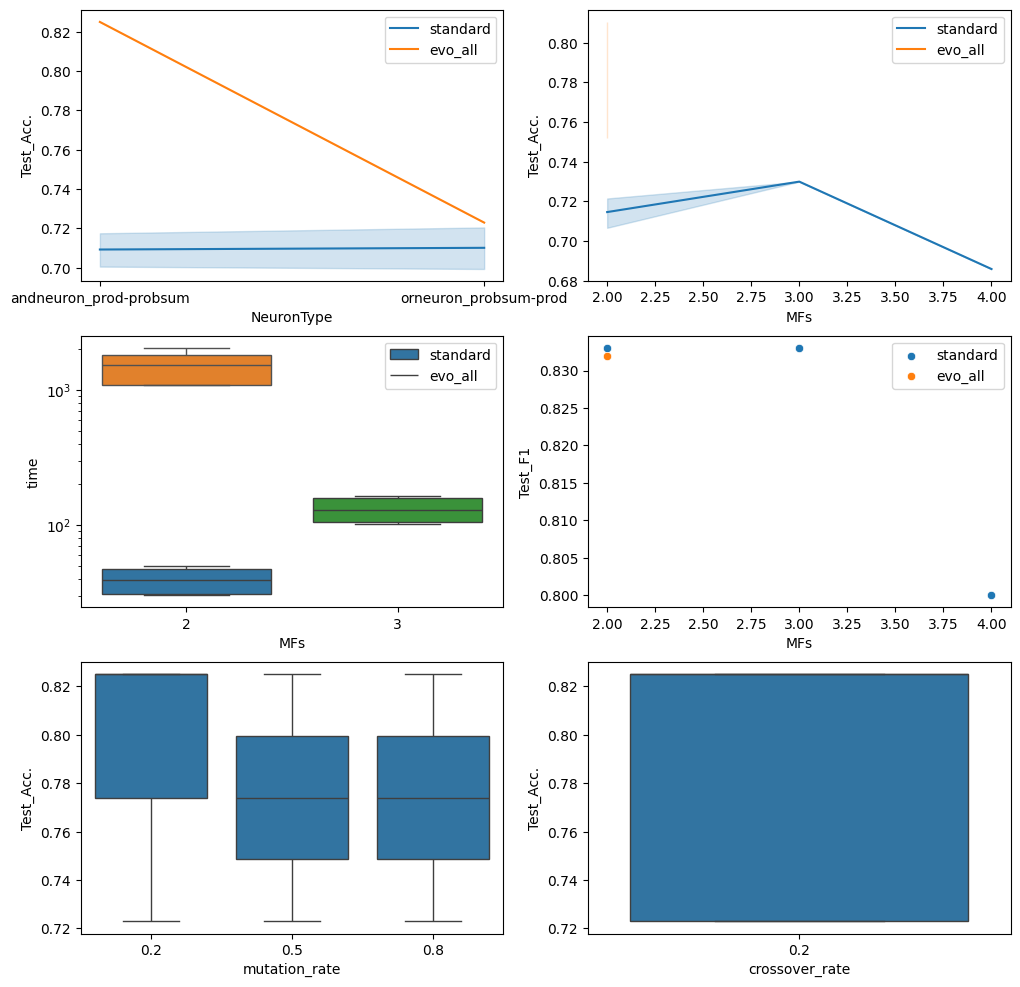

In [3]:
#load the data

global_results_standard = pd.read_csv(experiment_path_standard + "/global_result.csv")
global_results_evo_all = pd.read_csv(experiment_path_evo_all + "/global_result.csv")
# global_results_evo_partial = pd.read_csv(experiment_path_evo_partial + "/global_result.csv")


#plot the results
figure1, axs = plt.subplots(3, 2, figsize=(12, 12))
sns.lineplot(data=global_results_standard, x="NeuronType", y="Test_Acc.", label="standard", ax=axs[0,0])
sns.lineplot(data=global_results_evo_all, x="NeuronType", y="Test_Acc.", label="evo_all", ax=axs[0,0])

sns.lineplot(data=global_results_standard, x="MFs", y="Test_Acc.", label="standard", ax=axs[0,1], markers="o")
sns.lineplot(data=global_results_evo_all, x="MFs", y="Test_Acc.", label="evo_all", ax=axs[0,1], markers="o")
# sns.lineplot(data=global_results_evo_partial, x="MFs", y="Test_Acc.", label="evo_partial", ax=axs[0,1], markers="o")


sns.boxplot(data=global_results_standard[global_results_standard["MFs"]==2], x="MFs", y="time", ax=axs[1,0])
sns.boxplot(data=global_results_evo_all[global_results_evo_all["MFs"]==2], x="MFs", y="time",  ax=axs[1,0])
axs[1,0].legend(["standard", "evo_all"])
axs[1,0].set_yscale("log")

sns.boxplot(data=global_results_standard[global_results_standard["MFs"]==3], x="MFs", y="time", ax=axs[1,0])
sns.boxplot(data=global_results_evo_all[global_results_evo_all["MFs"]==3], x="MFs", y="time",  ax=axs[1,0])
axs[1,0].legend(["standard", "evo_all"])
axs[1,0].set_yscale("log")


#sns.boxplot(data=global_results_standard[global_results_standard["MFs"]==2], x="MFs", y="Test_F1", ax=axs[1,1])
#sns.boxplot(data=global_results_evo_all[global_results_evo_all["MFs"]==2], x="MFs", y="Test_F1", ax=axs[1,1])

#Get the best results on the validation set
best_standard = global_results_standard.loc[global_results_standard.groupby("MFs")["Test_F1"].idxmax()]
best_evo_all = global_results_evo_all.loc[global_results_evo_all.groupby("MFs")["Dev_F1"].idxmax()]
sns.scatterplot(data=best_standard, x="MFs", y="Test_F1", label="standard", ax=axs[1,1], markers="o")
sns.scatterplot(data=best_evo_all, x="MFs", y="Test_F1", label="evo_all", ax=axs[1,1], markers="o")


sns.boxplot(data=global_results_evo_all, x="mutation_rate", y="Test_Acc.", ax=axs[2,0])



sns.boxplot(data=global_results_evo_all, x="crossover_rate", y="Test_Acc.", ax=axs[2,1])
